In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6              4                  2                       0   
1         6              1                  2                       0   
2         6              3                  2                       0   
3         6              1                  2                       0   
4         6            609                  7                       4   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                        12                         0                      6   
1                        12                         0                      6   
2                        12                         0                      6   
3                        12                         0                      6   
4                       484     

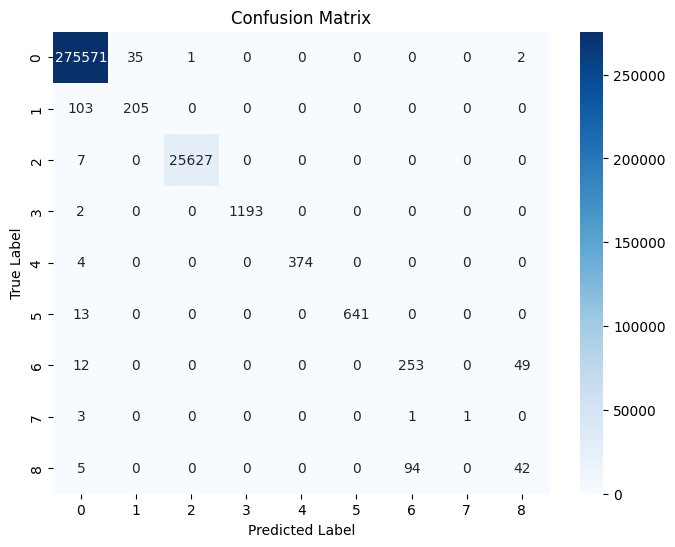

In [ ]:
!pip install pyarrow

from google.colab import drive
drive.mount('/content/drive')

# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/hony pot'

# Load data
df_data_1 = pd.read_parquet(f'{base_path}/Benign-Monday-no-metadata.parquet')
df_data_2 = pd.read_parquet(f'{base_path}/Botnet-Friday-no-metadata.parquet')
df_data_3 = pd.read_parquet(f'{base_path}/Bruteforce-Tuesday-no-metadata.parquet')
df_data_4 = pd.read_parquet(f'{base_path}/DDoS-Friday-no-metadata.parquet')
df_data_5 = pd.read_parquet(f'{base_path}/DoS-Wednesday-no-metadata.parquet')
df_data_6 = pd.read_parquet(f'{base_path}/Infiltration-Thursday-no-metadata.parquet')
df_data_5 = pd.read_parquet(f'{base_path}/Portscan-Friday-no-metadata.parquet')
df_data_6 = pd.read_parquet(f'{base_path}/WebAttacks-Thursday-no-metadata.parquet')

# Combine all datasets
df = pd.concat([
    df_data_1, df_data_2, df_data_3, df_data_4,
    df_data_5, df_data_6
], ignore_index=True)

# Check sample of the data
print(df.head())

# Clean the data and drop missing values
df.dropna(inplace=True)

# Encode string (categorical) columns to numbers
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Define the target column (make sure the column name is correct)
target_column = 'Label'  # Replace if your label column has a different name
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Accuracy: 0.998850380973373

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    395259
           1       0.80      0.66      0.72       290
           2       1.00      1.00      1.00     25529
           3       1.00      1.00      1.00      2052
           4       1.00      1.00      1.00     34892
           5       0.95      0.99      0.97      1037
           6       1.00      0.99      0.99      1043
           7       1.00      1.00      1.00      1191
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.94      0.91      0.93       374
          11       1.00      0.99      1.00       671
          12       0.72      0.88      0.79       288
          13       0.67      0.67      0.67         3
          14       0.36      0.16      0.22       124

    accuracy                           1.00    462762
   macro avg       0

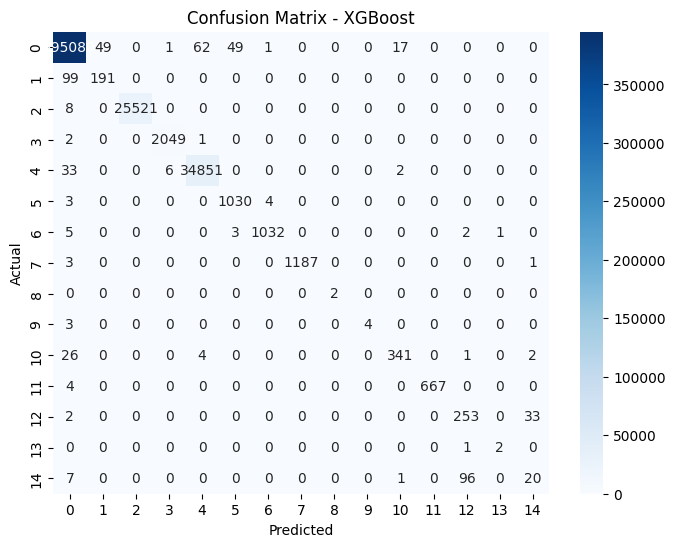

In [ ]:
# Install necessary libraries if not already installed
!pip install pyarrow xgboost

# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path where the data files are stored in Google Drive
base_path = '/content/drive/MyDrive/hony pot'

# Load the dataset files from Parquet format
df_data_1 = pd.read_parquet(f'{base_path}/Benign-Monday-no-metadata.parquet')
df_data_2 = pd.read_parquet(f'{base_path}/Botnet-Friday-no-metadata.parquet')
df_data_3 = pd.read_parquet(f'{base_path}/Bruteforce-Tuesday-no-metadata.parquet')
df_data_4 = pd.read_parquet(f'{base_path}/DDoS-Friday-no-metadata.parquet')
df_data_5 = pd.read_parquet(f'{base_path}/DoS-Wednesday-no-metadata.parquet')
df_data_6 = pd.read_parquet(f'{base_path}/Infiltration-Thursday-no-metadata.parquet')
df_data_7 = pd.read_parquet(f'{base_path}/Portscan-Friday-no-metadata.parquet')
df_data_8 = pd.read_parquet(f'{base_path}/WebAttacks-Thursday-no-metadata.parquet')

# Combine all the individual dataframes into one complete dataset
df = pd.concat([
    df_data_1, df_data_2, df_data_3, df_data_4,
    df_data_5, df_data_6, df_data_7, df_data_8
], ignore_index=True)

# Remove any rows with missing values
df.dropna(inplace=True)

# Encode categorical features into numerical format
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label'].astype('category').cat.codes

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the XGBoost classifier
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the mode
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [ ]:
import joblib
joblib.dump(model, "xgboost_model.pkl")

['xgboost_model.pkl']

In [ ]:
from google.colab import files
files.download("xgboost_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
import numpy as np

# Load the trained model
with open("/content/xgboost_model.pkl", "rb") as f:
    model = pickle.load(f)

# Create a dummy input (all features set to 0)
dummy = np.zeros((1, 77))

# Make prediction on the dummy input
print("Prediction on dummy:", model.predict(dummy))

Prediction on dummy: [0]


In [ ]:

#path
base_path = '/content/drive/MyDrive/hony pot'

#donload dataset
df_data_1 = pd.read_parquet(f'{base_path}/Benign-Monday-no-metadata.parquet')
df_data_2 = pd.read_parquet(f'{base_path}/Botnet-Friday-no-metadata.parquet')
df_data_3 = pd.read_parquet(f'{base_path}/Bruteforce-Tuesday-no-metadata.parquet')
df_data_4 = pd.read_parquet(f'{base_path}/DDoS-Friday-no-metadata.parquet')
df_data_5 = pd.read_parquet(f'{base_path}/DoS-Wednesday-no-metadata.parquet')
df_data_6 = pd.read_parquet(f'{base_path}/Infiltration-Thursday-no-metadata.parquet')
df_data_7 = pd.read_parquet(f'{base_path}/Portscan-Friday-no-metadata.parquet')


In [ ]:
print("Expected input shape:", model.n_features_in_)
print("Your features shape:", features.shape)


Expected input shape: 77
Your features shape: (1, 77)


In [ ]:
print(df.columns.tolist())

['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ra

In [ ]:
subset = df[df['Label'] == 'DoS Hulk']  # filter
if not subset.empty:
    print(subset.iloc[0])
else:
    print(" No data found")

Protocol                           6
Flow Duration                   1878
Total Fwd Packets                  3
Total Backward Packets             6
Fwd Packets Length Total         382
                              ...   
Idle Mean                        0.0
Idle Std                         0.0
Idle Max                           0
Idle Min                           0
Label                       DoS Hulk
Name: 1315573, Length: 78, dtype: object


In [ ]:
sample = df.loc[1315573]

In [ ]:
features_only = sample.drop('Label').values.tolist()

In [ ]:
# Install if needed
!pip install pyarrow

import pandas as pd
import pickle
import numpy as np

# Load dataset
df = pd.read_parquet(f'{base_path}/merged_dataset.parquet')

# Check label counts
print(df['Label'].value_counts())

# Pick an attack sample
attack_sample = df[df['Label'] != 0].iloc[0, :-1]  # drop label
X_test = attack_sample.values.reshape(1, -1)

# Load model
with open('xgboost_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Predict
prediction = model.predict(X_test)[0]
print("Prediction:", "Attack" if prediction != 0 else "Benign")

Label
Benign                        1977318
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64
Prediction: Benign


In [ ]:
attack_sample = df[df['Label'] == 'DoS Hulk'].iloc[0, :-1].values.reshape(1, -1)
model.predict(attack_sample)

array([4])

In [ ]:
# DoS Hulk
dos_hulk_sample = df[df['Label'] == 'DoS Hulk'].iloc[0, :-1].values.reshape(1, -1)
print(model.predict(dos_hulk_sample))

[4]


In [ ]:
!ls "/content/drive/MyDrive/hony pot"

Benign-Monday-no-metadata.parquet
Botnet-Friday-no-metadata.parquet
Bruteforce-Tuesday-no-metadata.parquet
DDoS-Friday-no-metadata.parquet
DoS-Wednesday-no-metadata.parquet
Infiltration-Thursday-no-metadata.parquet
merged_dataset.parquet
Portscan-Friday-no-metadata.parquet
WebAttacks-Thursday-no-metadata.parquet
xgboost_model.pkl


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:00:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy: 0.9984549293157173
XGBoost Accuracy: 0.9988244497171332
Voting Classifier Accuracy: 0.9987704262666338

Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    395464
           1       0.89      0.67      0.76       288
           2       1.00      1.00      1.00     25603
           3       1.00      1.00      1.00      2057
           4       1.00      1.00      1.00     34569
           5       0.93      0.99      0.96      1046
           6       1.00      0.99      0.99      1077
           7       1.00      1.00      1.00      1186
           8       1.00      1.00      1.00         2
           9       1.00      0.71      0.83         7
          10       0.92      0.92      0.92       391
          11       1.00      0.99      1.00       644
          12       0.75      0.83      0.79       294
          13       1.00      0.50      0.67         4
          14      

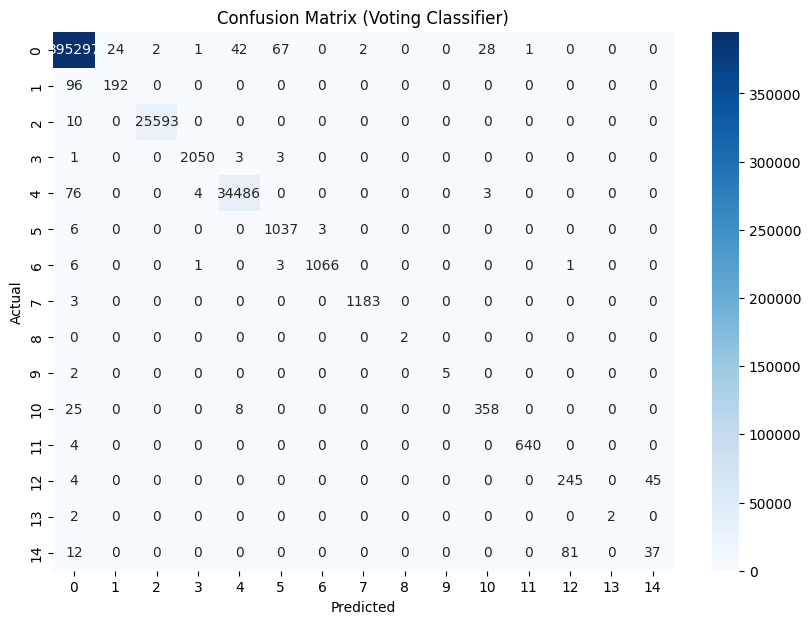

XGBoost AUC Score: 0.9998


In [ ]:

!pip install pyarrow xgboost

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/hony pot'
df1 = pd.read_parquet(f'{base_path}/Benign-Monday-no-metadata.parquet')
df2 = pd.read_parquet(f'{base_path}/Botnet-Friday-no-metadata.parquet')
df3 = pd.read_parquet(f'{base_path}/Bruteforce-Tuesday-no-metadata.parquet')
df4 = pd.read_parquet(f'{base_path}/DDoS-Friday-no-metadata.parquet')
df5 = pd.read_parquet(f'{base_path}/DoS-Wednesday-no-metadata.parquet')
df6 = pd.read_parquet(f'{base_path}/Infiltration-Thursday-no-metadata.parquet')
df7 = pd.read_parquet(f'{base_path}/Portscan-Friday-no-metadata.parquet')
df8 = pd.read_parquet(f'{base_path}/WebAttacks-Thursday-no-metadata.parquet')

# Combine all datasets
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)

# Clean data
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Encode categorical features
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

# Prepare features and labels
X = df.drop(columns=['Label'])
y = df['Label'].astype('category').cat.codes

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

# Predict with each model
y_pred_rf = rf_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

# Voting Classifier (ensemble)
voting_clf = VotingClassifier(estimators=[('RF', rf_clf), ('XGB', xgb_clf)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)

# Print accuracies
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_ensemble))

# Classification report for ensemble
print("\nClassification Report (Voting Classifier):")
print(classification_report(y_test, y_pred_ensemble))

# Confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Voting Classifier)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AUC Score
probs = xgb_clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, probs, multi_class='ovr')
print(f"XGBoost AUC Score: {auc_score:.4f}")

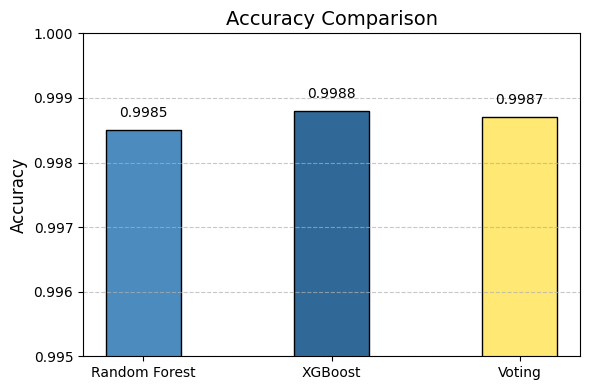

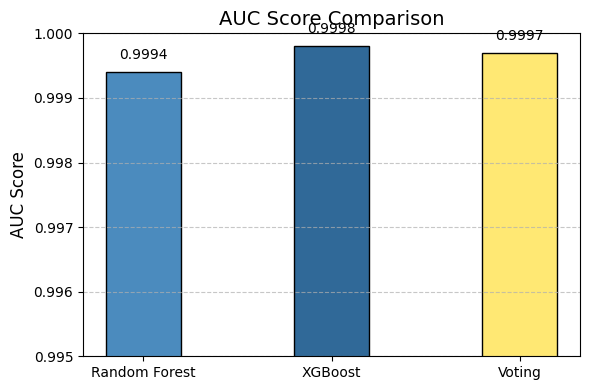

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'XGBoost', 'Voting']
accuracies = [0.9985, 0.9988, 0.9987]
auc_scores = [0.9994, 0.9998, 0.9997]
#colors
colors = ['#4B8BBE', '#306998', '#FFE873']

# Accuracy Bar Chart
plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=colors, width=0.4, edgecolor='black')
plt.title('Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.995, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0002, f'{yval:.4f}', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('accuracy_chart.png', dpi=300)
plt.show()

# AUC Bar Chart
plt.figure(figsize=(6, 4))
bars = plt.bar(models, auc_scores, color=colors, width=0.4, edgecolor='black')
plt.title('AUC Score Comparison', fontsize=14)
plt.ylabel('AUC Score', fontsize=12)
plt.ylim(0.995, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0002, f'{yval:.4f}', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('auc_chart.png', dpi=300)
plt.show()